In [154]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [155]:
akarsu_df = pd.read_csv('../RelevantData/akarsu_relevant.csv', parse_dates = ['Tarih'], index_col = 'Tarih')

In [156]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [157]:
akarsu_cols = ['Fekal_Koliform', 'Toplam_Koliform', 'Toplam_Fosfor', 'Toplam_Kjeldahl_Azotu', 'Kimyasal_Oksijen_İhtiyacı', 'Nitrat_Azotu', 'Çözünmüş_Oksijen']

In [158]:
akarsu_df

,Numune_Adı,Fekal_Koliform,Toplam_Koliform,Toplam_Fosfor,Toplam_Kjeldahl_Azotu,Toplam_Pestisit,Kimyasal_Oksijen_İhtiyacı,Nitrat_Azotu,Çözünmüş_Oksijen
Tarih,,,,,,,,,
05/07/02 00:00:00,BLYS1,1900.00000,2100.00000,0.10000,NaN,NaN,4.99995,0.69000,7.34000
05/07/02 00:00:00,BLYS2,1800.00000,2200.00000,0.05700,NaN,NaN,5.57000,0.42700,6.59000
05/07/02 00:00:00,BLYS3,1600.00000,2200.00000,0.00700,NaN,NaN,6.60000,0.47800,10.93000
05/07/03 00:00:00,BLYS4,1200.00000,1600.00000,4.50000,NaN,NaN,35.40000,0.08700,1.54000
05/07/03 00:00:00,BLYS5,1600.00000,2000.00000,1.42000,NaN,NaN,28.20000,0.04800,1.96000
...,...,...,...,...,...,...,...,...,...
2020-12-23 00:00:00,A50,150.00000,16000.00000,0.30200,0.50000,NaN,9.99990,0.47100,104.90000
2020-08-17 00:00:00,A51,1400.00000,120000.00000,0.09500,0.50000,NaN,20.17000,0.11200,81.00000
2020-09-23 00:00:00,A51,2500.00000,200000.00000,0.05230,1.45000,NaN,22.60000,0.12300,89.60000


In [159]:
# Removing Toplam_Pestisit column because 90% of it is empty.
akarsu_df = akarsu_df.drop(columns = 'Toplam_Pestisit')
# Dropping missing features
akarsu_df = akarsu_df.dropna()
# Manually correcting dates of two samples
akarsu_df.index = akarsu_df.index.str.replace("28:.12.2016", "28.12.2016", regex = True)
akarsu_df.index = akarsu_df.index.str.replace("22.009.2016", "22.09.2016", regex = True)

In [160]:
akarsu_df

,Numune_Adı,Fekal_Koliform,Toplam_Koliform,Toplam_Fosfor,Toplam_Kjeldahl_Azotu,Kimyasal_Oksijen_İhtiyacı,Nitrat_Azotu,Çözünmüş_Oksijen
Tarih,,,,,,,,
09/01/26 00:00:00,BLYS1,700.00000,2800.00000,0.24900,0.30200,10.40000,1.80000,85.70000
09/01/27 00:00:00,BLYS2,200.00000,1700.00000,0.34200,0.23000,4.99995,0.53600,84.50000
09/01/27 00:00:00,BLYS3,250.00000,500.00000,0.33600,0.36000,4.99995,0.25200,84.90000
09/01/26 00:00:00,BLYS80,1200.00000,2500.00000,0.32700,0.40300,8.20000,0.94600,82.30000
09/01/27 00:00:00,BLYS81,80.00000,200.00000,0.17100,0.18000,4.99995,0.15200,82.30000
...,...,...,...,...,...,...,...,...
2020-12-23 00:00:00,A50,150.00000,16000.00000,0.30200,0.50000,9.99990,0.47100,104.90000
2020-08-17 00:00:00,A51,1400.00000,120000.00000,0.09500,0.50000,20.17000,0.11200,81.00000
2020-09-23 00:00:00,A51,2500.00000,200000.00000,0.05230,1.45000,22.60000,0.12300,89.60000


In [161]:
df = akarsu_df.copy()
df['chunkID'] = df.groupby('Numune_Adı').ngroup()
df = df.drop(labels = ['Numune_Adı'], axis = 1)
df = df.sort_values(by=['chunkID', 'Tarih'])

In [162]:
df = df[df > 0].dropna()

In [163]:
df

,Fekal_Koliform,Toplam_Koliform,Toplam_Fosfor,Toplam_Kjeldahl_Azotu,Kimyasal_Oksijen_İhtiyacı,Nitrat_Azotu,Çözünmüş_Oksijen,chunkID
Tarih,,,,,,,,
11.06.2016,20000.00000,100000.00000,0.65000,6.90000,15.30000,0.02300,40.80000,1.00000
11/01/14 00:00:00,178.00000,242.00000,1.25000,0.50000,10.00000,0.27500,87.00000,1.00000
11/02/26 00:00:00,112.00000,121.00000,0.05500,0.50000,10.00000,0.96500,100.00000,1.00000
11/04/07 00:00:00,213.00000,230.00000,0.06000,0.91700,6.00000,0.92000,92.90000,1.00000
11/04/07 00:00:00,213.00000,230.00000,0.06000,0.91700,6.00000,0.92000,92.90000,1.00000
...,...,...,...,...,...,...,...,...
2018-07-12 00:00:00,1350.00000,3400.00000,0.01000,0.11000,19.99980,0.10000,7.98000,121.00000
2018-08-09 00:00:00,105.00000,250.00000,0.01000,0.10000,19.99980,0.16800,8.70000,121.00000
2018-09-20 00:00:00,430.00000,1100.00000,0.09900,0.10000,19.99980,0.10000,9.09000,121.00000


In [164]:
from scipy import stats

fitted_data = df.copy()
fitted_lambda_arr = []
for i in akarsu_cols:
    fitted_data[i], fitted_lambda = stats.boxcox(df[i])
    fitted_lambda_arr.append(fitted_lambda)


In [165]:
df = fitted_data.copy()

In [166]:
fitted_lambda_arr

[-0.03633951196684115,
 0.006414675243339354,
 -0.15936275467320662,
 -0.2528251817036067,
 -0.2036123156871416,
 0.15054149750825166,
 1.084744255662582]

In [167]:
recurrence = pd.DataFrame(df['chunkID'].value_counts())
recurrence

,chunkID
30.00000,84
27.00000,80
36.00000,79
75.00000,78
25.00000,77
...,...
65.00000,5
67.00000,5
66.00000,5
70.00000,3


In [168]:
df.index = df.index.str.replace("28:.12.2016", "28.12.2016", regex = True)
df.index = df.index.str.replace("22.009.2016", "22.09.2016", regex = True)

In [169]:
# Split Data
test_df = df.loc[df['chunkID'] == 73]
df = df[df['chunkID'] != 73]
data = df.drop(columns = 'chunkID')
test_df = test_df.drop(columns = 'chunkID')

train = data
#test = data.iloc[-test_indices:]
test = test_df
test_idx = test_df.index

In [170]:
test

,Fekal_Koliform,Toplam_Koliform,Toplam_Fosfor,Toplam_Kjeldahl_Azotu,Kimyasal_Oksijen_İhtiyacı,Nitrat_Azotu,Çözünmüş_Oksijen
Tarih,,,,,,,
05.09.2016,7.32520,10.82222,-0.36701,1.81273,2.27916,-2.87812,111.07631
09/01/17 00:00:00,6.51784,7.98079,-3.47386,-1.24027,2.04164,-0.36363,106.57311
09/02/06 00:00:00,5.38408,6.52999,-6.79691,-2.31133,1.83814,0.30699,118.07686
09/03/08 00:00:00,6.02683,7.25378,-6.79691,-1.09620,1.83814,1.02765,103.53086
09/04/01 00:00:00,6.25034,8.21553,-5.25341,-2.06376,2.45578,1.00526,108.45979
09/05/02 00:00:00,6.42210,8.21553,-6.79693,-2.23542,1.83814,0.80609,109.18612
09/06/03 00:00:00,5.38408,7.06309,-6.79693,-1.71855,1.83814,1.40263,105.26845
09/07/03 00:00:00,5.15147,6.95299,-6.79691,-1.20233,1.83814,0.74715,111.22182
09/08/17 00:00:00,3.64668,5.96939,-6.79693,-1.06314,1.83814,1.14259,100.92872


In [171]:
def swfit(df):
    stepwise_fit = auto_arima(df, trace=True)
    return stepwise_fit

In [172]:
fit_list = []
for col in akarsu_cols:
    res = swfit(df[col])
    fit_list.append(res.order)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18078.945, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17537.658, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17382.805, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18076.948, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17356.676, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.43 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.94 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=17364.210, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=17424.947, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=17354.679, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=17380.809, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=17535.661, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.41 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=i

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.44 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=49851.717, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=49959.773, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=49833.990, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=49875.649, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=50073.708, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.48 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.57 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=49849.717, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=49957.772, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.93 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 7.725 seconds


In [173]:
def train_arima(train, order):
    model = ARIMA(train, order=order)
    model = model.fit()
    return model

In [174]:
model_arr = []
i = 0
for col in akarsu_cols:
    res = train_arima(train[col], order = fit_list[i])
    model_arr.append(res)
    i += 1

/home/alpo/miniforge3/envs/venv2/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/alpo/miniforge3/envs/venv2/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/home/alpo/miniforge3/envs/venv2/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/alpo/miniforge3/envs/venv2/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: 

/home/alpo/miniforge3/envs/venv2/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alpo/miniforge3/envs/venv2/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/alpo/miniforge3/envs/venv2/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/home/alpo/miniforge3/envs/venv2/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated fre

In [175]:
from scipy.special import inv_boxcox

In [176]:
start = len(train)
end = len(train)+len(test)-1

pred_list = []
for i in range(7):
    pred = model_arr[i].predict(start=start, end=end, typ='levels')
    pred = pd.DataFrame(pred)
    res = inv_boxcox(pred, fitted_lambda_arr[i])
    res.index = test.index
    pred_list.append(pd.DataFrame(res))

/home/alpo/miniforge3/envs/venv2/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/home/alpo/miniforge3/envs/venv2/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/home/alpo/miniforge3/envs/venv2/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/home/alpo/miniforge3/envs/venv2/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be g

In [177]:
test_inv = []
for i in range(7):
    res = inv_boxcox(test[i], fitted_lambda_arr[i])
    #test_inv.append(res)

KeyError: 0

In [ ]:
test_inv = pd.DataFrame(scaler.inverse_transform(test))

In [ ]:
test_inv.index = test.index

In [ ]:
test_inv

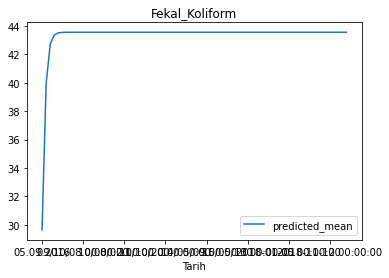

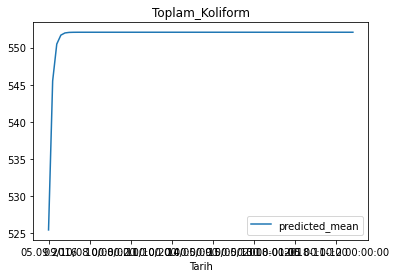

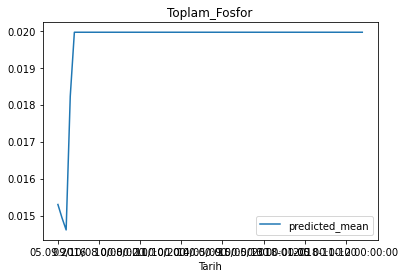

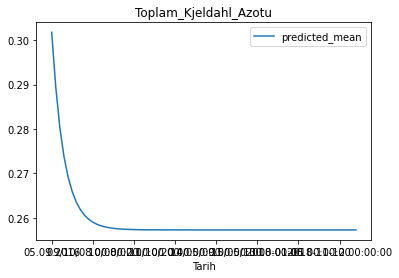

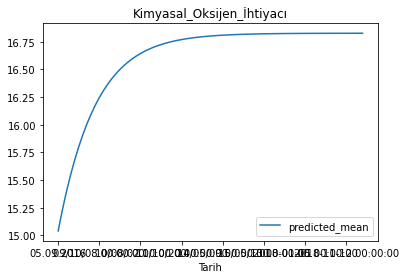

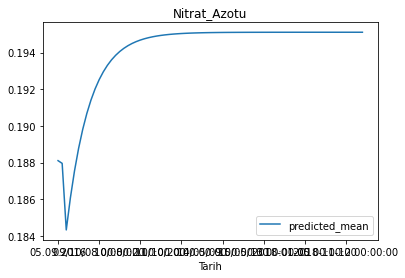

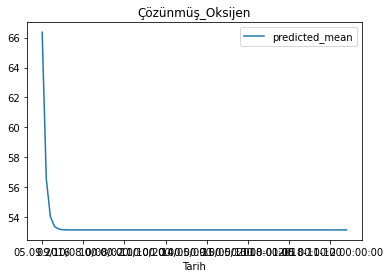

In [178]:
for i in range(7):
    pred_list[i].plot(legend = True, label = 'Predicted')
    #test_inv[i].plot(legend = True, label = 'Actual')
    plt.title(akarsu_cols[i])
    plt.savefig('../ml_images/arima/arima_'+akarsu_cols[i]+'.png')